In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

In [3]:
train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df.shape,test_df.shape

((60000, 785), (10000, 785))

acceptable format is float32 for tf and keras

In [7]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

Important Note : Since the image data in x_train and x_test is from 0 to 255 , we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 . It's important that the training set and the testing set be preprocessed in the same way!

In [8]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

splitting into training and validation (because we have a separate test file, we'll call test set of training data as validation set!)

In [9]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12)

x_train.shape, x_validate.shape, x_test.shape, y_train.shape, y_validate.shape, y_test.shape

((48000, 784), (12000, 784), (10000, 784), (48000,), (12000,), (10000,))

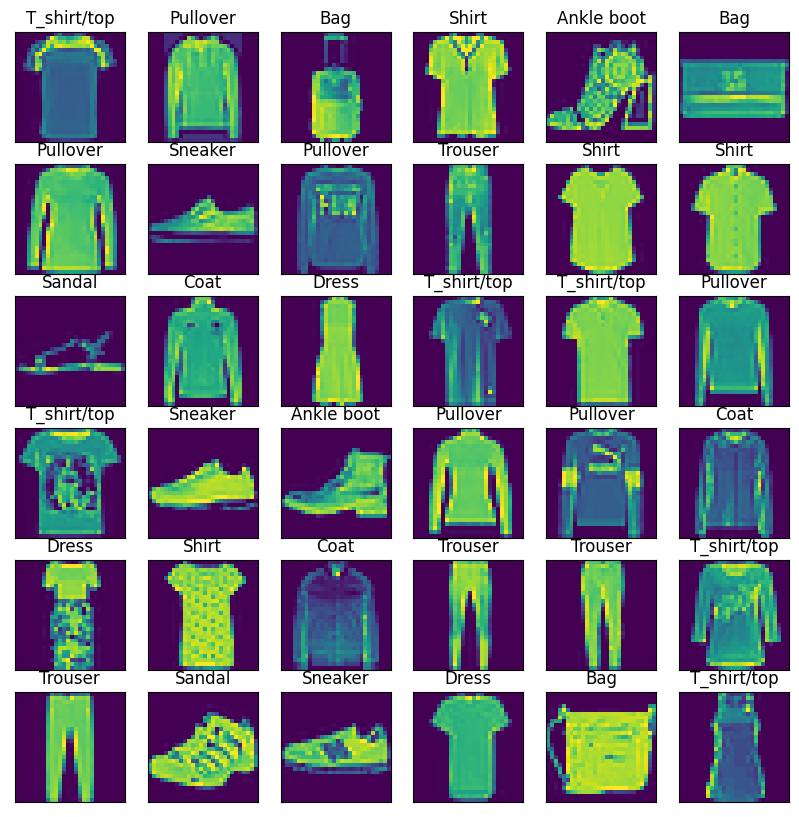

In [10]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

28 * 28 because 28 * 28 = 784, the number of pixels!

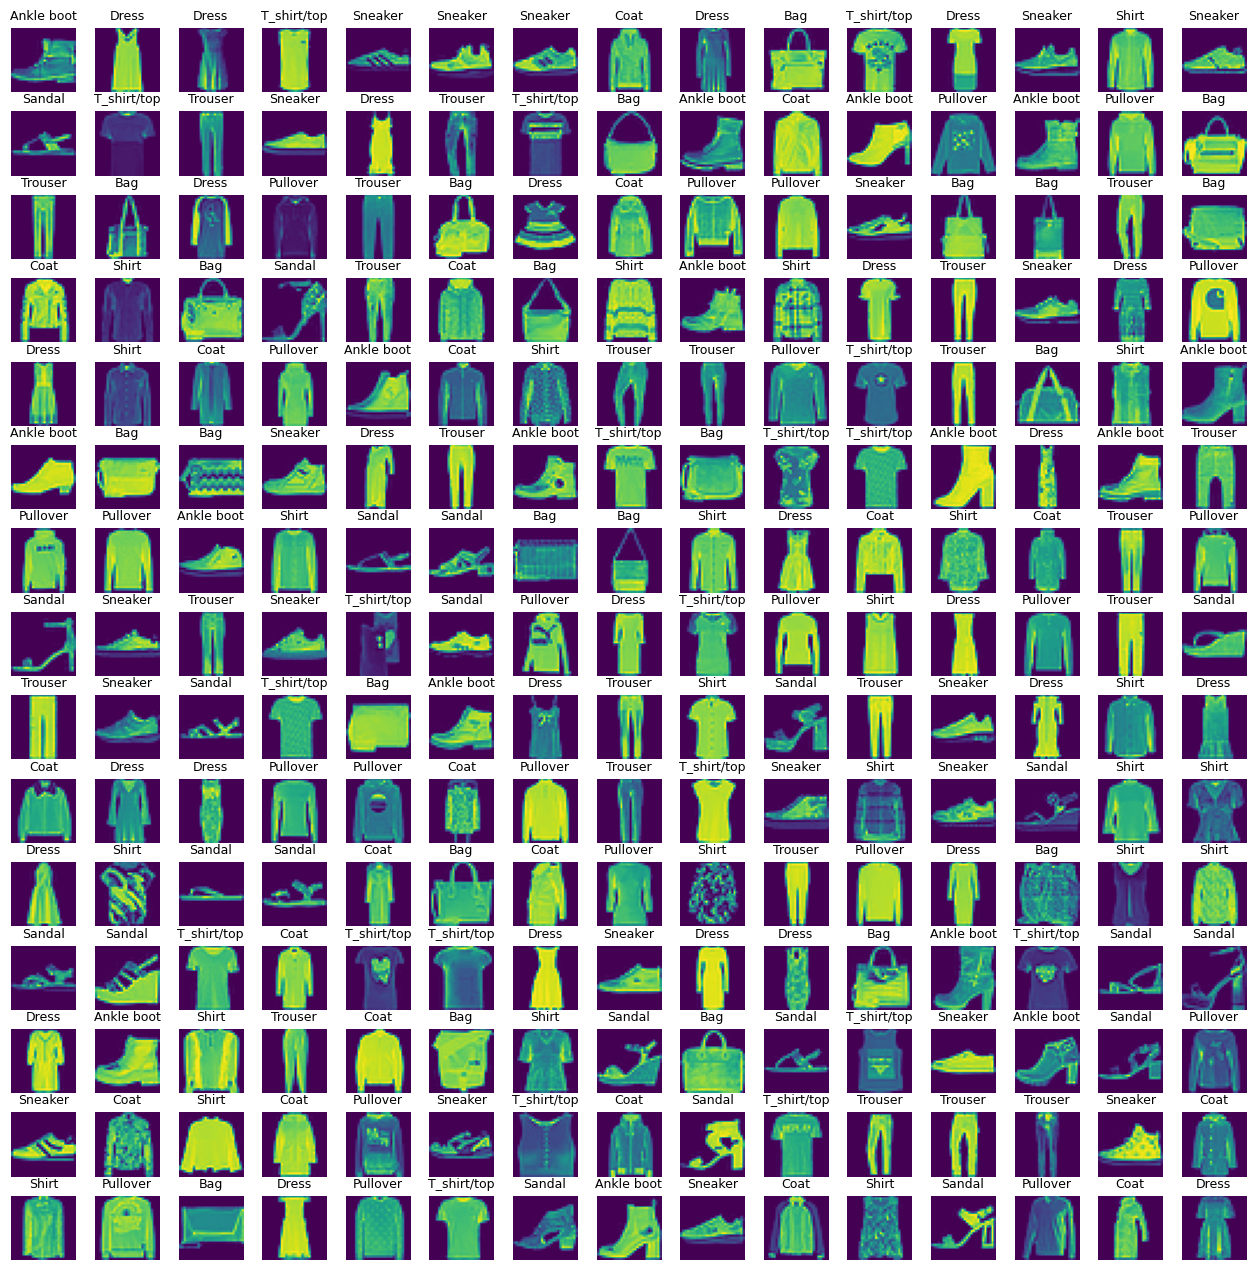

In [11]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [12]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

1 becuase image is grayscaled!

In [13]:
x_train.shape

(48000, 784)

In [14]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [15]:
x_train.shape

(48000, 28, 28, 1)

In [16]:
#Lets build a model with 2 Hidden Layers
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [19]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [20]:
history = model.fit(x_train,y_train,epochs=200,validation_data=(x_validate,y_validate),callbacks=[es])

Epoch 1/200
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7392 - accuracy: 0.7592 - val_loss: 0.5482 - val_accuracy: 0.8091
Epoch 2/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4958 - accuracy: 0.8292 - val_loss: 0.4716 - val_accuracy: 0.8342
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4506 - accuracy: 0.8435 - val_loss: 0.4561 - val_accuracy: 0.8374
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4215 - accuracy: 0.8532 - val_loss: 0.4357 - val_accuracy: 0.8429
Epoch 5/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4015 - accuracy: 0.8611 - val_loss: 0.4171 - val_accuracy: 0.8503
Epoch 6/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3853 - accuracy: 0.8655 - val_loss: 0.3962 - val_accuracy: 0.8558
Epoch 7/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3730 - accuracy: 0.8693 - val_loss: 0.4036 - val_ac

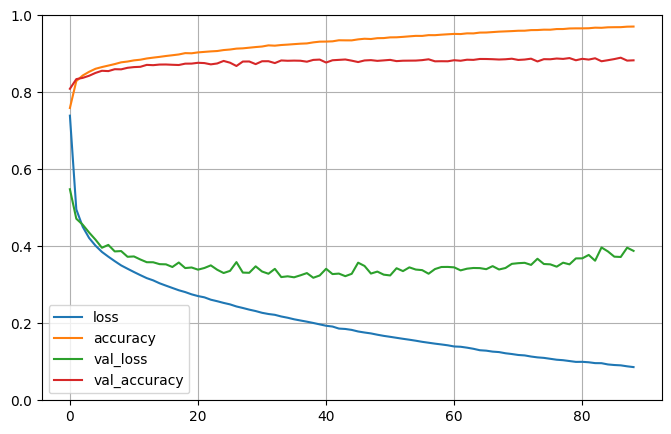

In [21]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3563 - accuracy: 0.8880


[0.35632243752479553, 0.8880000114440918]

In [23]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.3563
Test Accuracy : 0.8880


In [24]:
# we test our model on just 3 images from the test set
X_new = x_test[:15]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 59ms/step


array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.11, 0.  , 0.54, 0.  , 0.  , 0.  , 0.35, 0.  , 0.  , 0.  ],
       [0.28, 0.  , 0.59, 0.  , 0.  , 0.  , 0.13, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.02, 0.  , 0.  , 0.  , 0.94, 0.  , 0.02, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.01, 0.  , 0.18, 0.24, 0.19, 0.  , 0.36, 0.  , 0.02, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.16, 0.  , 0.81, 0.  , 0.04, 0.  , 0.  , 0.  ],
       [0.07, 0.  , 0.01, 0.  , 0.29, 0.  , 0.61, 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.

In [25]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([0, 1, 2, 2, 3, 6, 8, 6, 5, 0, 3, 4, 6, 6, 8], dtype=int64)

In [26]:
np.array(class_names)[y_pred]

array(['T_shirt/top', 'Trouser', 'Pullover', 'Pullover', 'Dress', 'Shirt',
       'Bag', 'Shirt', 'Sandal', 'T_shirt/top', 'Dress', 'Coat', 'Shirt',
       'Shirt', 'Bag'], dtype='<U11')

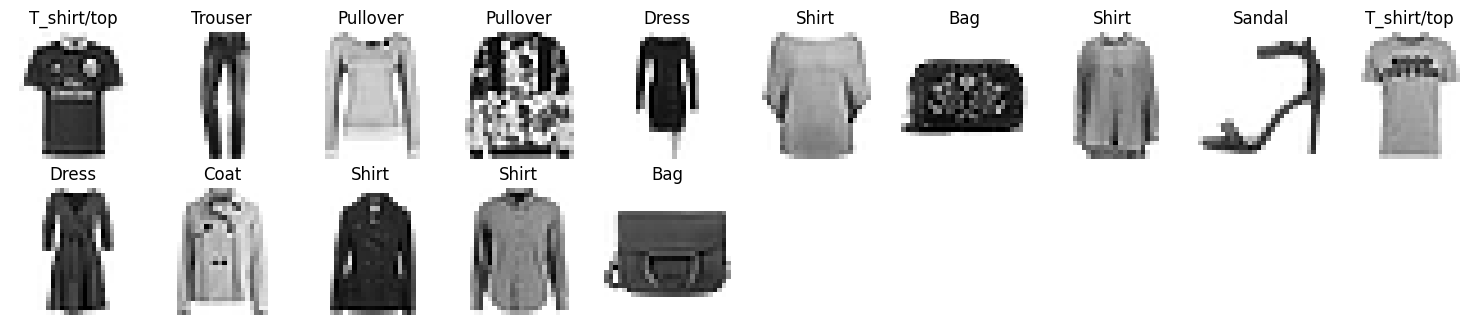

In [27]:
plt.figure(figsize=(15,8))
for i in range(15):
    plt.subplot(5,10,i+1)
    plt.imshow(X_new[i].reshape((28,28)),cmap='binary')
    plt.axis("off")
    plt.title(class_names[y_pred[i]])
plt.tight_layout()
plt.show()

different model

In [28]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape))
# model1.add(keras.layers.MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
model1.add(keras.layers.Flatten(input_shape=[28,28]))
model1.add(keras.layers.Dense(32,activation="relu"))
model1.add(keras.layers.Dense(10,activation="softmax"))

In [29]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                692256    
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 692,906
Trainable params: 692,906
Non-trainable params: 0
_________________________________________________________________


In [30]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
history = model1.fit(x_train,y_train,epochs=200,validation_data=(x_validate,y_validate),callbacks=[es])

Epoch 1/200


: 

: 